In [1]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_breast_cancer, load_iris
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# data

In [2]:
def rtheta2xy(r, theta):
    x = r*np.cos(theta)
    y = r*np.sin(theta)
    return np.array([x, y])

In [74]:
data = []
r = 2
num = 100
alpha = .8
theta = np.linspace(0, 2*np.pi, num)
x1 = rtheta2xy(r, theta)
x2 = rtheta2xy(r*2, theta)
x1 = x1 + np.random.randn(*x1.shape)*alpha
x2 = x2 + np.random.randn(*x2.shape)*alpha

In [75]:
x1_target = np.concatenate([x1, np.zeros((1, x1.shape[1]))], axis=0)
x2_target = np.concatenate([x2, np.ones((1, x2.shape[1]))], axis=0)

In [76]:
x1_target.shape

(3, 100)

In [77]:
data = pd.DataFrame(np.concatenate([x1_target, x2_target], axis=1).T, columns=["small", "large", "target"])
data.head()

,small,large,target
0,2.192939,-0.554642,0.0
1,1.137052,0.128726,0.0
2,1.208024,0.229304,0.0
3,3.095113,0.945876,0.0
4,2.107746,0.323204,0.0


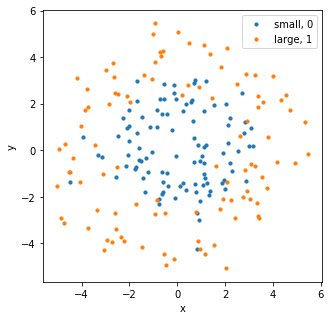

In [78]:
plt.figure(figsize=(5, 5))
x1 = data[data.target==0].drop("target", axis=1).values
x2 = data[data.target==1].drop("target", axis=1).values
plt.scatter(x1[:, 0], x1[:, 1], label="small, 0", s=10)
plt.scatter(x2[:, 0], x2[:, 1], label="large, 1", s=10)
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

# Preparation

In [79]:
from sklearn.model_selection import train_test_split

In [80]:
X = data.drop("target", axis=1).values
y = data["target"].values

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [82]:
X_train.shape, X_test.shape

((160, 2), (40, 2))

In [83]:
def get_decision_boundary(model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(5, 5))
    x1 = data[data.target==0].drop("target", axis=1).values
    x2 = data[data.target==1].drop("target", axis=1).values
    plt.scatter(x1[:, 0], x1[:, 1], label="small, 0", s=10)
    plt.scatter(x2[:, 0], x2[:, 1], label="large, 1", s=10)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.contour(xx, yy, Z, cmap=plt.cm.Paired)
    plt.show()
    return 

# Classification

In [84]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [95]:
svm = SVC(kernel="rbf", degree=20)

In [96]:
svm.fit(X_train, y_train)

SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=20, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [97]:
y_predict = svm.predict(X_train)
train_acc = accuracy_score(y_train, y_predict)
y_predict = svm.predict(X_test)
test_acc = accuracy_score(y_test, y_predict)
train_acc, test_acc

(0.50625, 0.475)

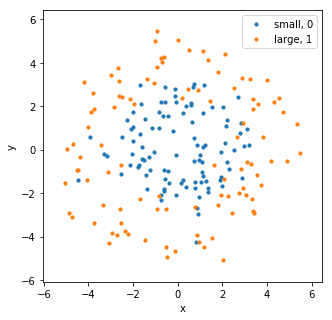

In [98]:
get_decision_boundary(svm)